In [1]:
import keras
from keras.layers import Input, Dense, Reshape, Flatten, LeakyReLU, Conv2DTranspose
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout
#from tensorflow.keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.datasets.cifar10 import load_data
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm
from matplotlib import pyplot
from numpy import asarray
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import exp
from keras import layers
import time


In [2]:
img_rows = 128
img_cols = 128
channels = 3
img_shape = (img_rows, img_cols, channels)

In [3]:
LATENT_DIM = 100
CHANNELS = 3

def build_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator


generator = build_generator()
print(generator.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 32768)             3309568   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      104883

In [4]:
#Build Descriminator

#Given an input image, the Discriminator outputs the likelihood of the image being real.
#Binary classification - true or false

######### MODEL 1 #########
def discriminator_1():
    model1=Sequential()
    model1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 3)))
    model1.add(MaxPooling2D(pool_size=(3, 3)))
    model1.add(Conv2D(32, kernel_size=3, activation='relu'))
    model1.add(MaxPooling2D(pool_size=(3, 3)))
    model1.add(Conv2D(32, kernel_size=3, activation='relu'))
    model1.add(MaxPooling2D(pool_size=(3, 3)))
    model1.add(Flatten())
    model1.add(Dense(64, activation='relu'))
    model1.add(Dropout(0.45))
    model1.add(Dense(1, activation='sigmoid'))    

    model1.compile(loss='binary_crossentropy',
                     optimizer=Adam(0.0002, 0.5),
                     metrics=['accuracy'])
    return model1

dm3 = discriminator_1()
print(dm3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [5]:

######### MODEL 2 #########

def discriminator_2():

    model2 = Sequential()

    # Pamameters Initialization
    inputShape = (img_rows, img_cols, 3)
    activation = 'relu'
    padding = 'same'
    droprate = 0.1
    epsilon=0.001

    model2 = Sequential()
    model2.add(BatchNormalization(input_shape=inputShape))
    model2.add(Conv2D(filters=6, kernel_size=3, activation=activation, padding=padding))
    model2.add(MaxPooling2D(pool_size=(3, 3)))
    model2.add(BatchNormalization(epsilon=epsilon))


    model2.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
    model2.add(MaxPooling2D(pool_size=(3, 3)))
    model2.add(BatchNormalization(epsilon=epsilon))
    model2.add(Dropout(droprate))

    model2.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
    model2.add(MaxPooling2D(pool_size=(3, 3)))

    model2.add(Flatten())
    model2.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.5))

    model2.add(Dense(128, activation='relu'))
    model2.add(Dropout(0.5))
    # model.add(Dropout(droprate))
    model2.add(Dense(1, activation='sigmoid'))

    model2.compile(loss='binary_crossentropy',
                     optimizer=Adam(0.0002, 0.5),
                     metrics=['accuracy'])
  
    return model2


dm2 = discriminator_2()
print(dm2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 6)       168       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 6)        0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 42, 42, 6)        24        
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 42, 42, 32)        1760      
                                                      

In [6]:
#for reading input images from directory

from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize
import os

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH =  "face_mask_dataset/"
train_ids = next(os.walk(TRAIN_PATH))[2]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    

100%|████████████████████████████████████████████████████████████████████████████████| 192/192 [00:21<00:00,  8.92it/s]


In [7]:
def save_imgs(epoch,generator):
	r, c = 5, 5
	noise = np.random.normal(0, 1, (r * c, 100))
	gen_imgs = generator.predict(noise)
	# Rescale images 0 - 1
	gen_imgs = 0.5 * gen_imgs + 0.5
	fig, axs = plt.subplots(r, c)
	cnt = 0
	for i in range(r):
			for j in range(c):
					axs[i,j].imshow(gen_imgs[cnt, :,:,0]) #, cmap='gray')
					axs[i,j].axis('off')
					cnt += 1
	fig.savefig("face_%d.png" % epoch)
	plt.close()


## ----- ## ----- ## ----- ## -----## ----- ## -----#### ----- ## ----- ## ----- #

def fid_score(real_imgs, gen_images):
	imgs = real_imgs.reshape(1,-1)
	gen_images1 = gen_images.reshape(1,-1)


	mu1 = imgs.mean(axis=0)
	sigma1 =cov(imgs, rowvar=False)

	mu2 = gen_images1.mean(axis=0)
	sigma2 =cov(gen_images1, rowvar=False)


	mu1 = np.atleast_1d(mu1)
	mu2 = np.atleast_1d(mu2)

	sigma1 = np.atleast_2d(sigma1)
	sigma2 = np.atleast_2d(sigma2)

	assert mu1.shape == mu2.shape
	assert sigma1.shape == sigma2.shape

	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)

	# calculate sqrt of product between cov
	covmean = sqrtm(np.dot(sigma1,sigma2))

	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real

	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	fid = fid/1000000000

	return round(fid,2)

## ----- ## ----- ## ----- ## -----## ----- ## -----#### ----- ## ----- ## ----- #

def plot_results_convergence(d_hist, g_hist, a_hist):
	# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.plot(d_hist, label='dis')
	pyplot.plot(g_hist, label='gen')
	pyplot.legend()
	# plot discriminator accuracy
	pyplot.subplot(2, 1, 2)
	pyplot.plot(a_hist, label='acc')
 
	pyplot.legend()
	# save plot to file
	pyplot.savefig('plot_line_plot_loss.png')


## ----- ## ----- ## ----- ## -----## ----- ## -----#### ----- ## ----- ## ----- #

def plot_results_collapse(d1_hist, d2_hist, g_hist, a1_hist, a2_hist):
	# plot loss
	pyplot.subplot(2, 1, 1)
	pyplot.plot(d1_hist, label='d-real')
	pyplot.plot(d2_hist, label='d-fake')
	pyplot.plot(g_hist, label='gen')
	pyplot.legend()
	# plot discriminator accuracy
	pyplot.subplot(2, 1, 2)
	pyplot.plot(a1_hist, label='acc-real')
	pyplot.plot(a2_hist, label='acc-fake')
	pyplot.legend()
	# save plot to file
	pyplot.savefig('plot_line_plot_loss.png')
	


# calculate the inception score for p(y|x)
def calculate_inception_score(p_yx, eps=1E-16):
	# calculate p(y)
	p_y = expand_dims(p_yx.mean(axis=0), 0)
	# kl divergence for each image
	kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
	# sum over classes
	sum_kl_d = kl_d.sum(axis=1)
	# average over images
	avg_kl_d = mean(sum_kl_d)
	# undo the logs
	is_score = exp(avg_kl_d)
	score = is_score/100000000000000
	return round(score,2)


import cv2
from skimage.metrics import structural_similarity
def compute_ssim(imgs1, imgs2):
    ssim_scores = []
    for i in range(len(imgs1)):
        grayA = cv2.cvtColor(imgs1[i], cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(imgs2[i], cv2.COLOR_BGR2GRAY)
        (score, diff) = structural_similarity(grayA, grayB, full=True)
        ssim_scores.append(score)
    return np.mean(score)



In [8]:
#Let us also define our optimizer for easy use later on.
#That way if you change your mind, you can change it easily here
# optimizer1 = Adam(0.0002, 0.5)
# optimizer2 = Adam(0.0002, 0.5)
# optimizer3 = Adam(0.0002, 0.5)

# Build and compile the discriminator first. 
#Generator will be trained as part of the combined model, later. 
#pick the loss function and the type of metric to keep track.                 
#Binary cross entropy as we are doing prediction and it is a better
#loss function compared to MSE or other. 
discM1,discM2 = discriminator_1(), discriminator_2()
#build and compile our Discriminator, pick the loss function

#SInce we are only generating (faking) images, let us not track any metrics.
generator1 = build_generator()
generator1.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.0002, 0.5))

generator2 = build_generator()
generator2.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.0002, 0.5))


## ----- ## ----- ## ----- ## -----## ----- ## -----##

##This builds the Generator and defines the input noise. 
#In a GAN the Generator network takes noise z as an input to produce its images.  
z = Input(shape=(100,))  #Our random input to the generator
img1 = generator1(z)
img2 = generator2(z)




#This ensures that when we combine our networks we only train the Generator.
#While generator training we do not want discriminator weights to be adjusted. 
#This Doesn't affect the above descriminator training. 
discM1.trainable = False
discM2.trainable = False



#This specifies that our Discriminator will take the images generated by our Generator
#and true dataset and set its output to a parameter called valid, which will indicate
#whether the input is real or not.  
valid1 = discM1(img1)  #Validity check on the generated image
valid2 = discM2(img2)



## ----- ## ----- ## ----- ## -----## ----- ## -----##

#Here we combined the models and also set our loss function and optimizer. 
#Again, we are only training the generator here. 
#The ultimate goal here is for the Generator to fool the Discriminator.  
# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity

combined1 = Model(z, valid1)
combined1.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

combined2 = Model(z, valid2)
combined2.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))





In [12]:
epochs=10
batch_size=32
save_interval=10

half_batch = int(len(X_train) / 2)

d_hist1, g_hist1, a_hist1 = list(),list(),list()
d_hist2, g_hist2, a_hist2 = list(),list(),list()
d_hist3, g_hist3, a_hist3 = list(),list(),list()

d1_hist1, d2_hist1, a1_hist1, a2_hist1 = list(), list(), list(), list()
d1_hist2, d2_hist2, a1_hist2, a2_hist2 = list(), list(), list(), list()


loss1 = 0
loss2 = 0


FID1 = []
IS1 = []

FID2 = []
IS2 = []



SSIM1 = []
SSIM2 = []



t = []

#We then loop through a number of epochs to train our Discriminator by first selecting
#a random batch of images from our true dataset, generating a set of images from our
#Generator, feeding both set of images into our Discriminator, and finally setting the
#loss parameters for both the real and fake images, as well as the combined loss. 
start = time.time()    
for epoch in range(epochs):
    e_start = time.time()

    # Select a random half batch of real images

    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]
        
    print("------ ------ ------")

    # ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- #

    if loss1 == 0 and loss2 == 0:
      print("------ Epoch : ", epoch , " ------")

      noise1  = np.random.normal(0,1, (half_batch, 100))
      gen_images1 = generator1.predict(noise1)  # Generate a half batch of fake images


      # Train the discriminator on real and fake images, separately
      #Research showed that separate training is more effective. 
      d_loss_real1, d_r_acc1 = discM1.train_on_batch(imgs, np.ones((half_batch, 1)))
      d_loss_fake1, d_f_acc1 = discM1.train_on_batch(gen_images1, np.zeros((half_batch, 1)))
      
      #take average loss from real and fake images. 
      d_loss1 = 0.5 * np.add([d_loss_real1,d_r_acc1], [d_loss_fake1,d_f_acc1])
    
    # ---- ## ---- ## ---- ## ---- #
        
      noise2  = np.random.normal(0,1, (half_batch, 100))
      gen_images2 = generator2.predict(noise2)
      d_loss_real2, d_r_acc2= discM2.train_on_batch(imgs, np.ones((half_batch, 1)))
      d_loss_fake2, d_f_acc2 = discM2.train_on_batch(gen_images2, np.zeros((half_batch, 1)))

      d_loss2 = 0.5 * np.add([d_loss_real2,d_r_acc2], [d_loss_fake2,d_f_acc2])
      
    # ---- ## ---- ## ---- ## ---- #
     
       
    # ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- #

      #And within the same loop we train our Generator, by setting the input noise and
      #ultimately training the Generator to have the Discriminator label its samples as valid
      #by specifying the gradient loss.
              # ---------------------
              #  Train Generator
              # ---------------------
      #Create noise vectors as input for generator. 
      #Create as many noise vectors as defined by the batch size. 
      #Based on normal distribution. Output will be of size (batch size, 100)

      noise1 = np.random.normal(0, 1, (batch_size, 100))
      noise2 = np.random.normal(0, 1, (batch_size, 100))
     

      # The generator wants the discriminator to label the generated samples
      # as valid (ones)
      #This is where the genrator is trying to trick discriminator into believing
      #the generated image is true (hence value of 1 for y)
      valid_y = np.array([1] * batch_size)

      # Generator is part of combined where it got directly linked with the discriminator
      # Train the generator with noise as x and 1 as y. 
      # Again, 1 as the output as it is adversarial and if generator did a great
      #job of folling the discriminator then the output would be 1 (true)    
      g_loss1 = combined1.train_on_batch(noise1, valid_y) 
      g_loss2 = combined2.train_on_batch(noise2, valid_y) 
   



    # ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- ## ---- #
      
      print(" Discrinator 1 : epoch %d [ loss: %f, acc. : %.2f%%] [Generator loss: %f] "% (epoch, d_loss1[0], 100*d_loss1[1], g_loss1))
      print(" Discrinator 2 : epoch %d [ loss: %f, acc. : %.2f%%] [Generator loss: %f] "% (epoch, d_loss2[0], 100*d_loss2[1], g_loss2))
     
      
      d_hist1.append(d_loss1[0]), g_hist1.append(d_loss1[0]), a_hist1.append(100*d_loss1[1])
      d_hist2.append(d_loss2[0]), g_hist2.append(d_loss2[0]), a_hist2.append(100*d_loss2[1])
   

      d1_hist1.append(d_loss_real1), d2_hist1.append(d_loss_fake1), a1_hist1.append(d_r_acc1), a2_hist1.append(d_f_acc1)
      d1_hist2.append(d_loss_real2), d2_hist2.append(d_loss_fake2), a1_hist2.append(d_r_acc2), a2_hist2.append(d_f_acc2)
      

  
    elif loss1 == 1:
      noise1  = np.random.normal(0,1, (half_batch, 100))
      gen_images1 = generator1.predict(noise1)

      d_loss_real1, d_r_acc1 = discM1.train_on_batch(imgs, np.ones((half_batch, 1)))
      d_loss_fake1, d_f_acc1 = discM1.train_on_batch(gen_images1, np.zeros((half_batch, 1)))
      
      d_loss1 = 0.5 * np.add([d_loss_real1,d_r_acc1], [d_loss_fake1,d_f_acc1])

      noise1 = np.random.normal(0, 1, (batch_size, 100))
      valid_y = np.array([1] * batch_size)

      g_loss1 = combined1.train_on_batch(noise1, valid_y) 

      d_hist1.append(d_loss1[0])
      g_hist1.append(d_loss1[0])
      a_hist1.append(100*d_loss1[1])

      d1_hist1.append(d_loss_real1), d2_hist1.append(d_loss_fake1), a1_hist1.append(d_r_acc1), a2_hist1.append(d_f_acc1)

      fid_score1 = fid_score(imgs, gen_images1)
      print("fid score1 :",fid_score1)
      p_yx = asarray([abs(imgs.reshape(1,-1)),abs(gen_images1.reshape(1,-1))])
      score = calculate_inception_score(p_yx)
      print("Inception Score:",score)
      FID1.append(fid_score1)
      IS1.append(score)

      ssim1 = compute_ssim(imgs, gen_images1)
      SSIM1.append(ssim1)
      print("SSIM : ",ssim1)

      print("Discrinator 1 : epoch %d [ loss: %f, acc. : %.2f%%] [Generator loss: %f] "% (epoch, d_loss1[0], 100*d_loss1[1], g_loss1))

      if epoch % save_interval == 0:
        #generator1.save('generator1_model.h5')
        save_imgs(epoch,generator1)
      
    # ---- ## ---- ## ---- ## ---- #
    
    elif loss2 == 1:
      noise2  = np.random.normal(0,1, (half_batch, 100))
      gen_images2 = generator2.predict(noise2)
      
      d_loss_real2, d_r_acc2= discM2.train_on_batch(imgs, np.ones((half_batch, 1)))
      d_loss_fake2, d_f_acc2 = discM2.train_on_batch(gen_images2, np.zeros((half_batch, 1)))
      
      d_loss2 = 0.5 * np.add([d_loss_real2,d_r_acc2], [d_loss_fake2,d_f_acc2])

      noise2 = np.random.normal(0, 1, (batch_size, 100))      
      valid_y = np.array([1] * batch_size)

      g_loss2 = combined2.train_on_batch(noise2, valid_y) 
      
      d_hist2.append(d_loss2[0])
      g_hist2.append(d_loss2[0])
      a_hist2.append(100*d_loss2[1])

      d1_hist2.append(d_loss_real2), d2_hist2.append(d_loss_fake2), a1_hist2.append(d_r_acc2), a2_hist2.append(d_f_acc2)

      fid_score2 = fid_score(imgs, gen_images2)
      print("fid score2 :",fid_score2)
      
      p_yx = asarray([abs(imgs.reshape(1,-1)),abs(gen_images2.reshape(1,-1))])
      score = calculate_inception_score(p_yx)
      print("Inception Score:",score)
      FID2.append(fid_score2)
      IS2.append(score)
      
      ssim2 = compute_ssim(imgs, gen_images2)
      SSIM2.append(ssim2)
      print("SSIM : ",ssim2)


      print("Discrinator 2 : epoch %d [ loss: %f, acc. : %.2f%%] [Generator loss: %f] "% (epoch, d_loss2[0], 100*d_loss2[1], g_loss2))
      
      if epoch % save_interval == 0:
        #generator2.save('generator2_model.h5')
        save_imgs(epoch,generator2)

      
    # ---- ## ---- ## ---- ## ---- #
    
    
    

    # ---- ## ---- ## ---- ## ---- #
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-e_start))
    print ('total time {} is {} sec'.format(epoch + 1, time.time()-start))
    t.append(time.time()-start)

    if epoch == 1:  
      if (d_loss1[0] < d_loss2[0]):
        loss1 = 1
     # elif (d_loss2[0] < d_loss1[0]) and (d_loss2[0] < d_loss3[0]):
      #  loss2 = 1
      else:
        loss2 = 1
    

------ ------ ------
------ Epoch :  0  ------
3/3 [==============================] - 72s 24s/step
 Discrinator 1 : epoch 0 [ loss: 11.860569, acc. : 11.98%] [Generator loss: 0.692744] 
 Discrinator 2 : epoch 0 [ loss: 1.436940, acc. : 22.40%] [Generator loss: 0.682602] 
Time for epoch 1 is 358.32293725013733 sec
total time 1 is 358.32293725013733 sec
------ ------ ------
------ Epoch :  1  ------
3/3 [==============================] - 72s 24s/step
 Discrinator 1 : epoch 1 [ loss: 2.780320, acc. : 35.94%] [Generator loss: 0.690904] 
 Discrinator 2 : epoch 1 [ loss: 0.854033, acc. : 47.40%] [Generator loss: 0.683651] 
Time for epoch 2 is 344.95825839042664 sec
total time 2 is 703.281195640564 sec
------ ------ ------
3/3 [==============================] - 72s 24s/step
fid score2 : 74.68
Inception Score: 563.21


C:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


SSIM :  0.00051104780155996
Discrinator 2 : epoch 2 [ loss: 0.719823, acc. : 57.29%] [Generator loss: 0.686492] 
Time for epoch 3 is 170.92490673065186 sec
total time 3 is 874.2061023712158 sec
------ ------ ------
3/3 [==============================] - 71s 24s/step
fid score2 : 78.56
Inception Score: 1881.75
SSIM :  0.0003920229718480155
Discrinator 2 : epoch 3 [ loss: 0.651440, acc. : 61.98%] [Generator loss: 0.689996] 
Time for epoch 4 is 170.59121870994568 sec
total time 4 is 1044.7973210811615 sec
------ ------ ------
3/3 [==============================] - 73s 24s/step
fid score2 : 72.39
Inception Score: 314.25
SSIM :  0.006041470864502322
Discrinator 2 : epoch 4 [ loss: 0.459112, acc. : 84.38%] [Generator loss: 0.690639] 
Time for epoch 5 is 171.02025151252747 sec
total time 5 is 1215.817572593689 sec
------ ------ ------
3/3 [==============================] - 73s 24s/step
fid score2 : 75.11
Inception Score: 790.09
SSIM :  2.156248061113285e-05
Discrinator 2 : epoch 5 [ loss: 0.3

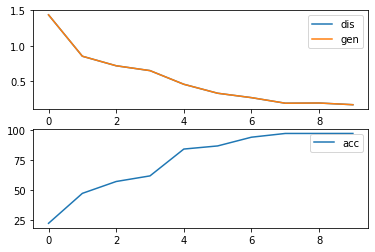

In [13]:
if loss1 == 1:
  plot_results_convergence(d_hist1, g_hist1, a_hist1)
else:
  plot_results_convergence(d_hist2, g_hist2, a_hist2)


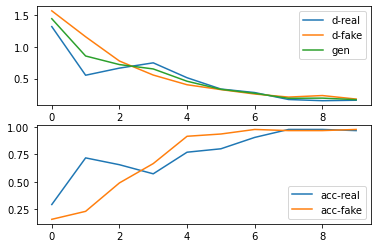

In [14]:
if loss1 == 1:
  plot_results_collapse(d1_hist1, d2_hist1, g_hist1, a1_hist1, a2_hist1)
else:
  plot_results_collapse(d1_hist2, d2_hist2, g_hist2, a1_hist2, a2_hist2)

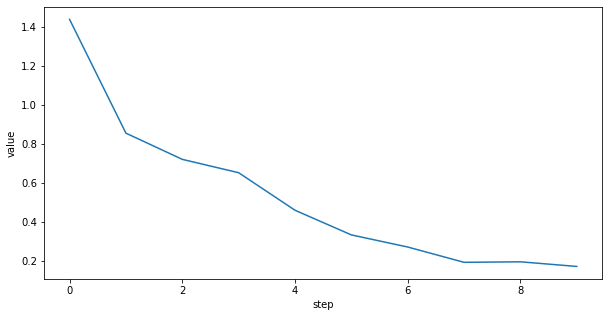

In [17]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(d_hist1, label='dis')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

else:
  #loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(d_hist2, label='dis')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()



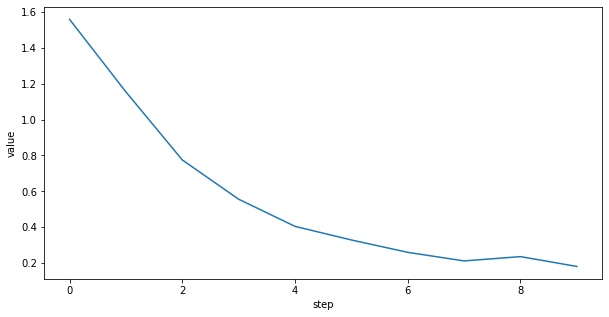

In [18]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(d2_hist1, label='d-fake')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

else:
#loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(d2_hist2, label='d-fake')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

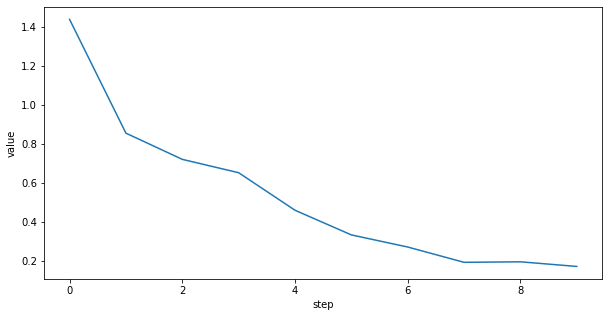

In [19]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(g_hist1, label='gen')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()
else:
#loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(g_hist2, label='gen')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

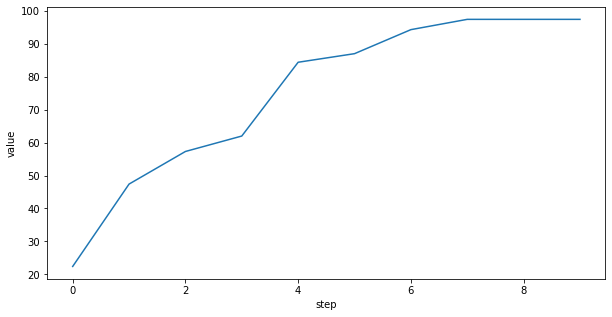

In [20]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(a_hist1, label='acc')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()
else:
#loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(a_hist2, label='acc')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

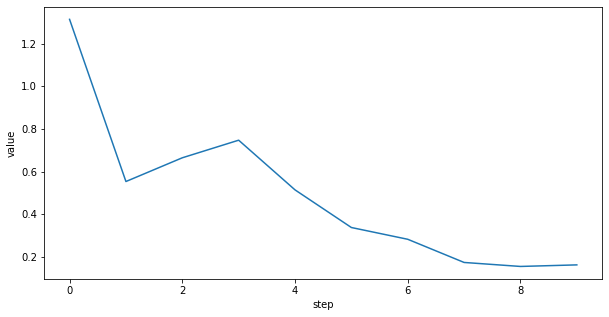

In [21]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(d1_hist1, label='d-real')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()
else:
#loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(d1_hist2, label='d-real')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()

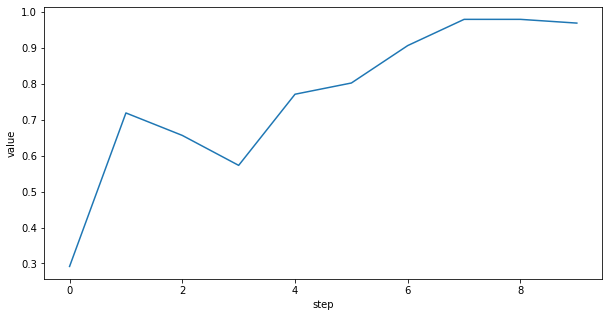

In [22]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(a1_hist1, label='acc-real')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()
else:
    #loss2 == 1:
  plt.figure(figsize=(10,5))
  plt.plot(a1_hist2, label='acc-real')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()



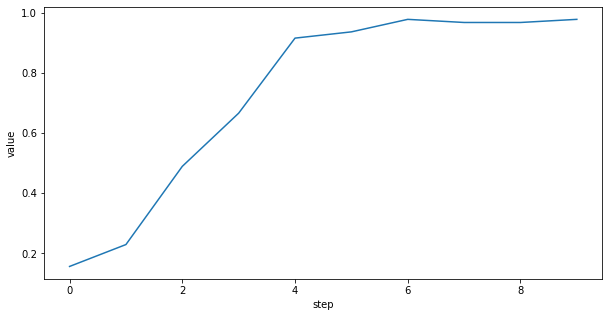

In [23]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(a2_hist1, label='acc-fake')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()
else:
  plt.figure(figsize=(10,5))
  plt.plot(a2_hist2, label='acc-fake')
  plt.xlabel("step")
  plt.ylabel("value")
  plt.show()




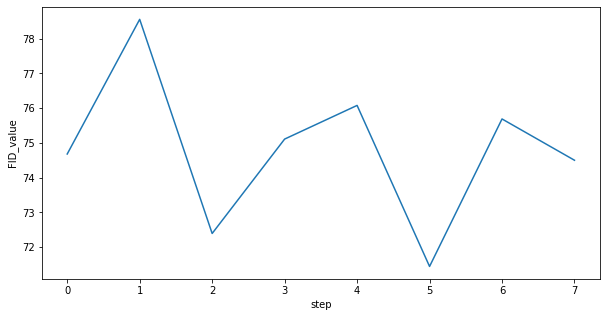

In [24]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(FID1, label='FID 1')
  plt.xlabel("step")
  plt.ylabel("FID_value")
  plt.show()
else:
  plt.figure(figsize=(10,5))
  plt.plot(FID2, label='FID 2')
  plt.xlabel("step")
  plt.ylabel("FID_value")
  plt.show()

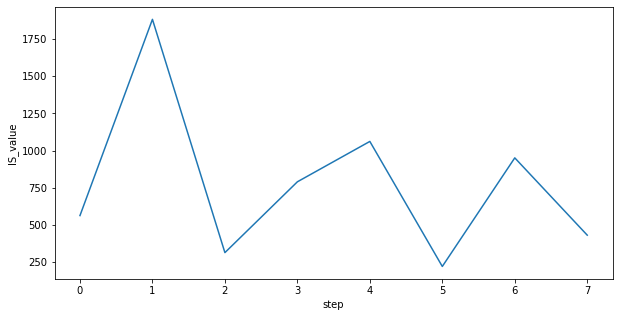

In [25]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(IS1, label='IS 1')
  plt.xlabel("step")
  plt.ylabel("IS_value")
  plt.show()
else:
  plt.figure(figsize=(10,5))
  plt.plot(IS2, label='IS 2')
  plt.xlabel("step")
  plt.ylabel("IS_value")
  plt.show()




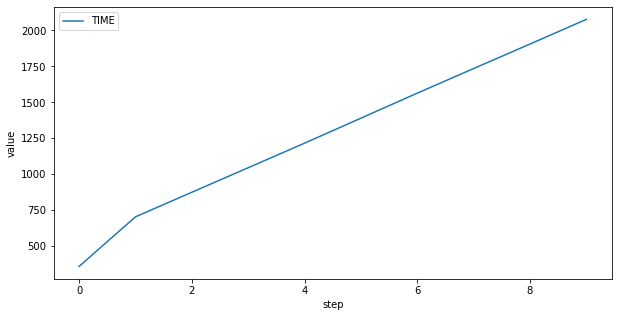

In [26]:
plt.figure(figsize=(10,5))
plt.plot(t,label="TIME")
plt.xlabel("step")
plt.ylabel("value")
plt.legend()
plt.show()


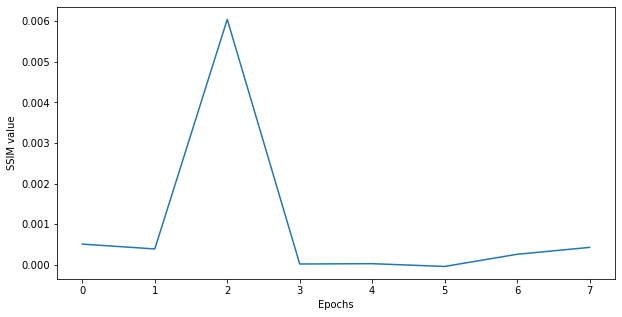

In [27]:
if loss1 == 1:    
  plt.figure(figsize=(10,5))
  plt.plot(SSIM1,label="SSIM 1")
  plt.xlabel("Epochs")
  plt.ylabel("SSIM value")
  plt.show()
else:
  plt.figure(figsize=(10,5))
  plt.plot(SSIM2,label="SSIM 2")
  plt.xlabel("Epochs")
  plt.ylabel("SSIM value")
  plt.show()

